<a href="https://colab.research.google.com/github/shammy1462/ShammyAkter/blob/main/batch%20normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5428 - accuracy: 0.8119 - val_loss: 0.4323 - val_accuracy: 0.8470
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3853 - accuracy: 0.8632 - val_loss: 0.4206 - val_accuracy: 0.8462
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3502 - accuracy: 0.8737 - val_loss: 0.4036 - val_accuracy: 0.8527
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3222 - accuracy: 0.8819 - val_loss: 0.3668 - val_accuracy: 0.8686
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3067 - accuracy: 0.8880 - val_loss: 0.3569 - val_accuracy: 0.8699
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2883 - accuracy: 0.8940 - val_loss: 0.3555 - val_accuracy: 0.8733
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2754 - accuracy: 0.8983 - val_loss: 0.3602 - val_accuracy: 0.8704
Epoch 

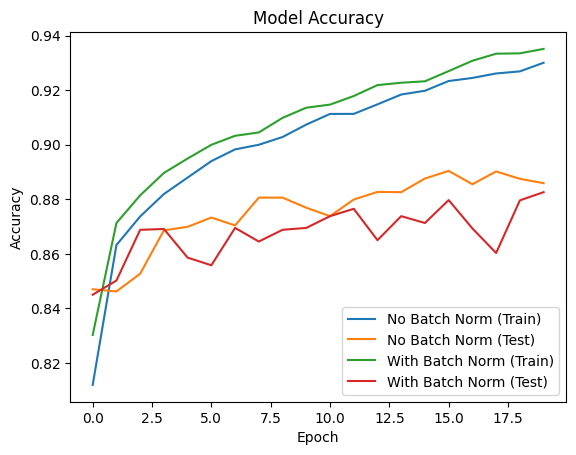

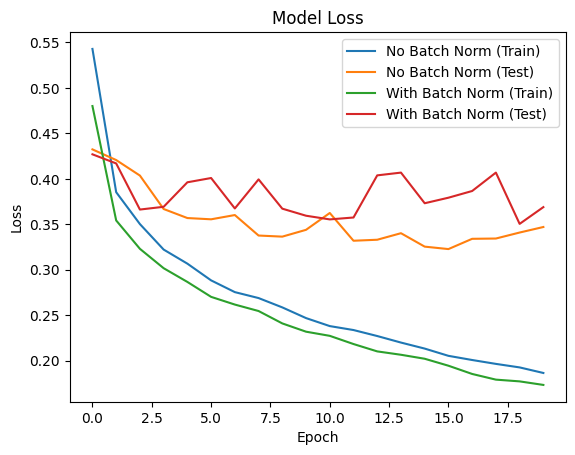

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to build the neural network model
def build_model(use_batch_norm=False):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    return model

# Compile the models
model_no_batch_norm = build_model(use_batch_norm=False)
model_no_batch_norm.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

model_with_batch_norm = build_model(use_batch_norm=True)
model_with_batch_norm.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Train the models
history_no_batch_norm = model_no_batch_norm.fit(train_images, train_labels,
                                                epochs=20, batch_size=128,
                                                validation_data=(test_images, test_labels))

history_with_batch_norm = model_with_batch_norm.fit(train_images, train_labels,
                                                    epochs=20, batch_size=128,
                                                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history_no_batch_norm.history['accuracy'], label='No Batch Norm (Train)')
plt.plot(history_no_batch_norm.history['val_accuracy'], label='No Batch Norm (Test)')
plt.plot(history_with_batch_norm.history['accuracy'], label='With Batch Norm (Train)')
plt.plot(history_with_batch_norm.history['val_accuracy'], label='With Batch Norm (Test)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_no_batch_norm.history['loss'], label='No Batch Norm (Train)')
plt.plot(history_no_batch_norm.history['val_loss'], label='No Batch Norm (Test)')
plt.plot(history_with_batch_norm.history['loss'], label='With Batch Norm (Train)')
plt.plot(history_with_batch_norm.history['val_loss'], label='With Batch Norm (Test)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
